In [2]:
import pandas as pd
import numpy as np
from scipy import *
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

### TEST 1

1.Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные. Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки.

In [4]:
water = pd.read_csv('water.txt', delimiter='\t')
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [5]:
water[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


2.В предыдущей задаче посчитайте значение коэффициента корреляции Спирмена между средней годовой смертностью и жёсткостью воды. Округлите до четырёх знаков после десятичной точки.

In [7]:
stats.spearmanr(water[['mortality', 'hardness']])

SpearmanrResult(correlation=-0.63166461891665016, pvalue=4.79546153722838e-08)

3.Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.

In [9]:
south = water[water.location=='South']
north = water[water.location=='North']

In [10]:
south.corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [11]:
north.corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


4.Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.

Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.

In [12]:
a = 239
b = 515
c = 203
d = 718

In [13]:
mcc = (a*d-b*c)/np.sqrt((a+b)*(a+c)*(b+d)*(c+d))
print mcc

0.109002374587


5.В предыдущей задаче проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля. Посчитайте достигаемый уровень значимости; используйте функцию scipy.stats.chi2_contingency. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [15]:
obs = np.array([[a, b], [c, d]])
chi2, p, dof, ex  = stats.chi2_contingency(obs)

In [17]:
p

1.0558987006638725e-05

6.В предыдущей задаче давайте попробуем ответить на немного другой вопрос: отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре? Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин. Чему равна его нижняя граница? Округлите до четырёх знаков после десятичной точки.

In [29]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [30]:
men = np.concatenate([np.ones(a), np.zeros(b)])
women = np.concatenate([np.ones(c), np.zeros(d)])

In [31]:
print proportions_confint_diff_ind(men, women)

(0.053905233215813156, 0.13922183141523897)


In [32]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [33]:
print proportions_diff_z_stat_ind(men, women)

4.46111444482


7.Проверьте гипотезу о равенстве долей любителей часто проводить вечера в баре среди мужчин и женщин. Посчитайте достигаемый уровень значимости, используя двустороннюю альтернативу. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [34]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [35]:
print proportions_diff_z_test(proportions_diff_z_stat_ind(men, women))

8.15345308958e-06


8.Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?" 

Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? Округлите ответ до четырёх знаков после десятичной точки.

In [44]:
happy = np.array([[197, 111, 33], [382, 685, 331], [110, 342, 333]])
chi2, p, dof, ex = stats.chi2_contingency(happy)

In [51]:
chi2

293.68311039689746

9.На данных из предыдущего вопроса посчитайте значение достигаемого уровня значимости. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [49]:
p

2.4964299580093467e-62

10.Чему в предыдущей задаче равно значение коэффициента V Крамера для рассматриваемых признаков? Округлите ответ до четырёх знаков после десятичной точки.

In [38]:
chi2 = stats.chi2_contingency(happy)[0]
n = np.sum(happy)
V_Kr = np.sqrt(chi2/(n*2)) #считаем коэффициент Крамера для категоиальных величин в общем случае

In [39]:
V_Kr

0.2412013934500338

### TEST 2

1.Классификатор C4.5 и три его модификации: с оптимизацией гиперпараметра m, гиперпараметра cf и с одновременной оптимизацией обоих гиперпараметров. Эти четыре классификатора сравнивались на 14 наборах данных. На каждом датасете был посчитан AUC каждого классификатора. Используя критерий знаковых рангов, проведите попарное сравнение каждого классификатора с каждым. Выберите два классификатора, различие между которыми наиболее статистически значимо.

In [5]:
aucs = pd.read_csv('AUCs.txt', delimiter='\t')
aucs

,Unnamed: 0,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
0,adult (sample),0.763,0.768,0.771,0.798
1,breast cancer,0.599,0.591,0.590,0.569
2,breast cancer wisconsin,0.954,0.971,0.968,0.967
3,cmc,0.628,0.661,0.654,0.657
4,ionosphere,0.882,0.888,0.886,0.898
5,iris,0.936,0.931,0.916,0.931
6,liver disorders,0.661,0.668,0.609,0.685
7,lung cancer,0.583,0.583,0.563,0.625
8,lymphography,0.775,0.838,0.866,0.875
9,mushroom,1.000,1.000,1.000,1.000


In [34]:
wilcoxon1 = stats.wilcoxon(aucs['C4.5'], aucs['C4.5+m'])
wilcoxon2 = stats.wilcoxon(aucs['C4.5'], aucs['C4.5+cf'])
wilcoxon3 = stats.wilcoxon(aucs['C4.5'], aucs['C4.5+m+cf'])
wilcoxon4 = stats.wilcoxon(aucs['C4.5+m'], aucs['C4.5+cf'])
wilcoxon5 = stats.wilcoxon(aucs['C4.5+m'], aucs['C4.5+m+cf'])
wilcoxon6 = stats.wilcoxon(aucs['C4.5+cf'], aucs['C4.5+m+cf'])

In [35]:
wilcoxon1,wilcoxon2,wilcoxon3,wilcoxon4,wilcoxon5,wilcoxon6

(WilcoxonResult(statistic=6.5, pvalue=0.01075713311978963),
 WilcoxonResult(statistic=43.0, pvalue=0.86126233009534803),
 WilcoxonResult(statistic=11.0, pvalue=0.015906444101703374),
 WilcoxonResult(statistic=17.0, pvalue=0.046332729793395394),
 WilcoxonResult(statistic=22.0, pvalue=0.32782567584464062),
 WilcoxonResult(statistic=10.0, pvalue=0.022909099354356588))

2.Сколько статистически значимых на уровне 0.05 различий мы обнаружили?
Ответ: 4

3.Сравнивая 4 классификатора между собой, мы проверили 6 гипотез. Давайте сделаем поправку на множественную проверку. Начнём с метода Холма. Сколько гипотез можно отвергнуть на уровне значимости 0.05 после поправки этим методом? Ответ: 0

In [29]:
pvalues = np.array(wilcoxon)[:,1]
print pvalues

[ 0.01075713  0.86126233  0.01590644  0.04633273  0.32782568  0.0229091 ]


In [30]:
reject, p_corrected_h, a1, a2 = multipletests(pvalues, alpha = 0.05, method = 'holm')

In [31]:
p_corrected_h

array([ 0.0645428 ,  0.86126233,  0.07953222,  0.13899819,  0.65565135,
        0.0916364 ])

4.Сколько гипотез можно отвергнуть на уровне значимости 0.05 после поправки методом Бенджамини-Хохберга? Ответ: 3

In [32]:
reject, p_corrected_bh, a1, a2 = multipletests(pvalues, alpha = 0.05, method = 'fdr_bh')

In [33]:
p_corrected_bh

array([ 0.0458182 ,  0.86126233,  0.0458182 ,  0.06949909,  0.39339081,
        0.0458182 ])

5.Мы подозреваем, что в проведённом с C4.5 эксперименте на самом деле классификаторы сильнее отличаются друг от друга, просто нам не удалось это заметить. Что можно сделать, чтобы увеличить вероятность обнаружения различий, если они действительно существуют? Ответ: взять больше датасетов, попробовать настроить больше гиперпараметров

### TEST 3

In [49]:
# Давайте научимся оценивать количество детей ceb по остальным признакам.

botswana = pd.read_csv('botswana.tsv', delimiter='\t')
print botswana.shape
botswana.head()

# О каждой из них мы знаем:
# сколько детей она родила (признак ceb) - НЕПРЕРЫВНЫЙ
# возраст (age) - НЕПРЕРЫВНЫЙ
# длительность получения образования (educ) - НЕПРЕРЫВНЫЙ
# религиозная принадлежность (religion) - КАТЕГОРИАЛЬНЫЙ
# идеальное, по её мнению, количество детей в семье (idlnchld) - НЕПРЕРЫВНЫЙ
# была ли она когда-нибудь замужем (evermarr) - БИНАРНЫЙ
# возраст первого замужества (agefm) - НЕПРЕРЫВНЫЙ
# длительность получения образования мужем (heduc) - НЕПРЕРЫВНЫЙ
# знает ли она о методах контрацепции (knowmeth) - БИНАРНЫЙ
# использует ли она методы контрацепции (usemeth) - БИНАРНЫЙ
# живёт ли она в городе (urban) - БИНАРНЫЙ
# есть ли у неё электричество, радио, телевизор и велосипед (electric, radio, tv, bicycle) - БИНАРНЫЙ

(4361, 15)


,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [50]:
# 1.Сколько разных значений принимает признак religion?
botswana['religion'].value_counts()

spirit        1841
other         1080
protestant     993
catholic       447
Name: religion, dtype: int64

In [51]:
sum(botswana['heduc'].isnull())

2405

In [52]:
sum(botswana['agefm'].isnull())

2282

In [53]:
# 2. Во многих признаках есть пропущенные значения. Сколько объектов из 4361 останется, если выбросить все, содержащие пропуски?
botswana_dropped = botswana.dropna()
print botswana_dropped.shape

(1834, 15)


In [54]:
# 3. Давайте используем этот метод для обработки пропусков в agefm и heduc.
# Создайте признак nevermarr, равный единице там, где в agefm пропуски.
# Удалите признак evermarr — в сумме с nevermarr он даёт константу, значит, в нашей матрице X будет мультиколлинеарность.
# Замените NaN в признаке agefm на cagefm=0.
# У объектов, где nevermarr = 1, замените NaN в признаке heduc на cheduc1=−1 (ноль использовать нельзя, так как он уже встречается у некоторых объектов выборки).

# Сколько осталось пропущенных значений в признаке heduc?

botswana['nevermarr']=[1 if np.isnan(val) else 0 for val in botswana['agefm']]
botswana.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [55]:
botswana.drop('evermarr', axis=1, inplace=True)
botswana.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [56]:
botswana['agefm'].fillna(0, inplace=True)
botswana.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [57]:
botswana['heduc'] = np.where(botswana['nevermarr']==1, -1, botswana['heduc'])
botswana.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [58]:
sum(botswana['heduc'].isnull())

123

In [60]:
# 4. Избавимся от оставшихся пропусков. 
# Для признаков idlnchld, heduc и usemeth проведите операцию, аналогичную предыдущей: 
#  создайте индикаторы пропусков по этим признакам (idlnchld_noans, heduc_noans, usemeth_noans), 
# замените пропуски на нехарактерные значения (cidlnchld=−1, cheduc2=−2 (значение -1 мы уже использовали), cusemeth=−1).

# Теперь остались только пропуски в признаках knowmeth, electric, radio, tv и bicycle. 
# Их очень мало, так что удалите объекты, на которых их значения пропущены.

# Какого размера теперь наша матрица данных? Умножьте количество строк на количество всех столбцов (включая отклик ceb).

botswana['idlnchld_noans']=[1 if np.isnan(val) else 0 for val in botswana['idlnchld']]
botswana['heduc_noans']=[1 if np.isnan(val) else 0 for val in botswana['heduc']]
botswana['usemeth_noans']=[1 if np.isnan(val) else 0 for val in botswana['usemeth']]
botswana.tail()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
4356,0,16,7,protestant,2.0,1.0,0.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4357,2,28,7,protestant,4.0,1.0,1.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4358,4,24,5,protestant,4.0,1.0,1.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4359,1,26,0,spirit,5.0,1.0,0.0,22.0,7.0,0,0.0,1.0,0.0,0.0,0,0,0,0
4360,6,36,3,protestant,8.0,1.0,1.0,21.0,0.0,0,0.0,1.0,0.0,0.0,0,0,0,0


In [63]:
botswana['idlnchld'].fillna(-1, inplace=True)
botswana['heduc'].fillna(-2, inplace=True)
botswana['usemeth'].fillna(-1, inplace=True)

In [66]:
print (sum(botswana['knowmeth'].isnull()))
print (sum(botswana['electric'].isnull()))
print (sum(botswana['radio'].isnull()))
print (sum(botswana['tv'].isnull()))
print (sum(botswana['bicycle'].isnull()))

7
3
2
2
3


In [67]:
botswana_dropped2 = botswana.dropna()
botswana_dropped2.shape

(4348, 18)

In [68]:
import statsmodels.formula.api as smf

In [71]:
# 5. Постройте регрессию количества детей ceb на все имеющиеся признаки методом smf.ols, как в разобранном до этого примере. 
# Какой получился коэффициент детерминации R2? Округлите до трёх знаков после десятичной точки.

import statsmodels.formula.api as smf

# Cтроим линейную регрессионную модель для количества детей  ceb для всех признаков.
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric +'\
             'radio + tv + bicycle + nevermarr + idlnchld_noans +heduc_noans + usemeth_noans', data=botswana_dropped2)
fitted = m1.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Wed, 28 Feb 2018   Prob (F-statistic):               0.00
Time:                        13:48:13   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

Populating the interactive namespace from numpy and matplotlib


/Applications/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


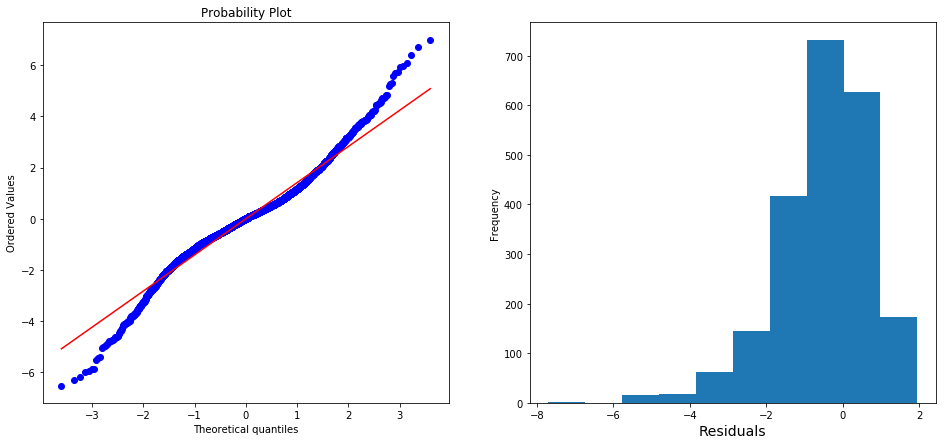

In [76]:
import matplotlib.pyplot as plt
import scipy as sc
%pylab inline

# Посмотрим на распределение остатков:
plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

In [ ]:
# 6. Обратите внимание, что для признака religion в модели автоматически создалось несколько бинарных фиктивных переменных. 
# Сколько их? 3

In [2]:
# 7. Проверьте критерием Бройша-Пагана гомоскедастичность ошибки в построенной модели. Выполняется ли она?
# Если ошибка гетероскедастична, перенастройте модель, сделав поправку Уайта типа HC1.
import statsmodels.stats.api as sms

# Ошибка гетероскедастична, p≤0.05, нужно делать поправку Уайта
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1] 

In [1]:
# 8. Удалите из модели незначимые признаки religion, radio и tv. 
# Проверьте гомоскедастичность ошибки, при необходимости сделайте поправку Уайта.

botswana_dropped2.drop('religion',axis=1, inplace=True)
botswana_dropped2.drop('radio',axis=1, inplace=True)
botswana_dropped2.drop('tv',axis=1, inplace=True)
botswana_dropped2.head()

In [79]:
# Cтроим линейную регрессионную модель для параметра ceb на пространство признаков за вычетом удаленных.
m2 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric +'\
             'bicycle + nevermarr + idlnchld_noans +heduc_noans + usemeth_noans', data=botswana_dropped2)
fitted = m2.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Wed, 28 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:26:31   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

In [3]:
# повторно проверим гомоскедатичность ошибок модели:
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1] 

In [81]:
# Ошибки гетероскедастичны, значит, значимость признаков может определяться неверно. Сделаем поправку Уайта:
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric +'\
             'bicycle + nevermarr + idlnchld_noans +heduc_noans + usemeth_noans', data=botswana_dropped2)
fitted = m3.fit(cov_type='HC1')
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Wed, 28 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:35:23   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [89]:
# Не произошло ли значимого ухудшения модели после удаления этой группы признаков? Проверьте с помощью критерия Фишера. 
# Чему равен его достигаемый уровень значимости? Округлите до четырёх цифр после десятичной точки.

# Если достигаемый уровень значимости получился маленький, верните все удалённые признаки; 
# если он достаточно велик, оставьте модель без религии, тв и радио.

# compare_f_test 	use F test to test whether restricted model is correct
# Гипотеза - значимого ухудшения модели после удаления этой группы признаков не произошло - подтвердилась с уровнем значимости 0.467 
print "F=%f, p=%f, k1=%f" % m1.fit().compare_f_test(m3.fit())

F=0.919236, p=0.467231, k1=5.000000


In [ ]:
# 9. Признак usemeth_noans значим по критерию Стьюдента, то есть, при его удалении модель значимо ухудшится. 
# Но вообще-то отдельно его удалять нельзя: из-за того, что мы перекодировали пропуски в usemeth произвольно выбранным значением
# cusemeth=−1, удалять usemeth_noans и usemeth можно только вместе.Удалите из текущей модели usemeth_noans и usemeth. 

In [85]:
botswana_dropped3 = botswana_dropped2.drop('usemeth',axis=1)
botswana_dropped3 = botswana_dropped3.drop('usemeth_noans',axis=1)
botswana_dropped3.head()

,ceb,age,educ,idlnchld,knowmeth,agefm,heduc,urban,electric,bicycle,nevermarr,idlnchld_noans,heduc_noans
0,0,18,10,4.0,1.0,0.0,-1.0,1,1.0,1.0,1,0,0
1,2,43,11,2.0,1.0,20.0,14.0,1,1.0,1.0,0,0,0
2,0,49,4,4.0,1.0,22.0,1.0,1,1.0,0.0,0,0,0
3,0,24,12,2.0,1.0,0.0,-1.0,1,1.0,1.0,1,0,0
4,3,32,13,3.0,1.0,24.0,12.0,1,1.0,1.0,0,0,0


In [86]:
# Проверьте критерием Фишера гипотезу о том, что качество модели не ухудшилось. 
# Введите номер первой значащей цифры в достигаемом уровне значимости (например, если вы получили 5.5×10−8, нужно ввести 8).

m4 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + agefm + heduc + urban + electric +'\
                    ' bicycle + nevermarr + idlnchld_noans + heduc_noans', 
             data=botswana_dropped3)
fitted = m4.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     611.3
Date:                Wed, 28 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:43:05   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.202     -5.

In [87]:
# Если достигаемый уровень значимости получился маленький, верните удалённые признаки;
# если он достаточно велик, оставьте модель без usemeth и usemeth_noans.
m3.fit().compare_f_test(m4.fit())

(92.890582301097581, 3.1552009480386492e-40, 2.0)